<a href="https://colab.research.google.com/github/lauracarbaugh/wrangling_assignment/blob/main/wrangling_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!git clone https://github.com/lauracarbaugh/wrangling_assignment.git

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 23 (delta 7), reused 0 (delta 0), pack-reused 10 (from 2)
Receiving objects: 100% (23/23), 5.88 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [86]:
!git config --global user.name "lauracarbaugh"
!git config --global user.email "rnr7tu@virginia.edu"

In [ ]:
ls

sample_data/  wrangling_assignment/


In [87]:
cd wrangling_assignment/

/content/wrangling_assignment/data/wrangling_assignment/data/wrangling_assignment


In [88]:
cd data

/content/wrangling_assignment/data/wrangling_assignment/data/wrangling_assignment/data


In [89]:
ls -al

total 12192
drwxr-xr-x 2 root root    4096 Sep  2 02:27 ./
drwxr-xr-x 4 root root    4096 Sep  2 02:27 ../
-rw-r--r-- 1 root root 3414307 Sep  2 02:27 airbnb_hw.csv
-rw-r--r-- 1 root root 7181667 Sep  2 02:27 justice_data.parquet
-rw-r--r-- 1 root root 1873502 Sep  2 02:27 mn_police_use_of_force.csv


In [90]:
import pandas as pd
import numpy as np
airbnb = pd.read_csv("airbnb_hw.csv")
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [91]:
# Question 1.1
airbnb['clean_price'] = airbnb['Price'].str.replace(',', '').str.replace('$', '')
airbnb['clean_price'] = pd.to_numeric(airbnb['clean_price'], errors='coerce')
airbnb['clean_price']

,clean_price
0,145
1,37
2,28
3,199
4,549
...,...
30473,300
30474,125
30475,80
30476,35


Question 1.1: I replaced commas with empty space so values over 1,000 are still treated as integers, and then I converted the column to numeric values. I also checked for missing values but there were none so I did not change anything

In [92]:
police = pd.read_csv("mn_police_use_of_force.csv")
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [93]:
# Question 1.2
police['subject_injury'].unique()
police['clean_subject_injury'] = police['subject_injury'].str.strip().str.lower().replace({'yes':'Yes', 'no':'No'})
prop_missing = police['clean_subject_injury'].isna().mean()
print(prop_missing)
force_subject = pd.crosstab(police['subject_injury'] , police['force_type'], dropna=False)
print(force_subject)

0.7619342359767892
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                            0   
NaN            

76% of the values are missing in the subejct injury variable which is cause for concern. Missingness shows up the most in the bodily force, chemical irritant, and taser categories.

In [95]:
# Question 1.3
justice = pd.read_parquet("justice_data.parquet")
justice['WhetherDefendantWasReleasedPretrial'].unique()
justice['released_pretrial'] = justice['WhetherDefendantWasReleasedPretrial'].replace(np.nan, 9)
print(justice['released_pretrial'])

0        9
1        0
2        0
3        0
4        1
        ..
22981    1
22982    1
22983    1
22984    1
22985    1
Name: released_pretrial, Length: 22986, dtype: int64


In [97]:
# Question 1.4
justice['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()
justice['ImposedSentenceAllChargeInContactEvent'].unique()
justice['imposedsentence_clean'] = pd.to_numeric(justice['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
non_incarceration = ['Fine', 'Probation', 'Community Service']
justice.loc[justice['SentenceTypeAllChargesAtConvictionInContactEvent'].isin(non_incarceration) & justice['imposedsentence_clean'].isna(),
'imposedsentence_clean'] = 0

I compared the values for the SentenceTypeAllChargesAtConvictionInContactEvent and the ImposedSentenceAllChargeInContactEvent variables. I renamed one of the variables to imposedsentence_clean so that it would be easier to work with. Then I compared the sentence type and sentence length to see if if there were missing values for sentences that did not involve serving for a length of time. I then made a variable for the sentence types that did not require serving time, and any observation that was part of that variable and had a NaN value for the imposed sentence was changed to 0 to reflect that no time was necessary to serve since the individual was not incarcerated.

In [ ]:
# Question 2
from google.colab import drive
drive.mount('/content/drive')

saf = pd.read_excel("/content/drive/My Drive/GSAF5.xls")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!cp "/content/drive/My Drive/GSAF5.xls" /content/wrangling_assignment/data/GSAF5.xls


In [ ]:
!ls /content/wrangling_assignment/data


airbnb_hw.csv  justice_data.parquet	   wrangling_assignment
GSAF5.xls      mn_police_use_of_force.csv


In [ ]:
# Question 2.2
saf = saf.dropna(axis=1, how="all")
saf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,original order,Unnamed: 21,clean_year,age_clean,sex_clean,type_clean,Type_clean,Clean_Fatal,species_clean,is_white
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,NaN,NaN,2025.0,63,MALE,Unprovoked,NaN,N,undetermined,False
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,NaN,NaN,2025.0,9,MALE,Unprovoked,NaN,N,suspected great white,True
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,NaN,NaN,2025.0,39,FEMALE,Unprovoked,NaN,N,undetermined,False
5,28th July,2025.0,Unprovoked,Australia,South Australia,Seacliff beach Adelaide,Kayaking,Nathaniel Drummond,M,19,...,NaN,NaN,2025.0,19,MALE,Unprovoked,NaN,N,great white shark est 3m (10ft),True
6,25th July,2025.0,Unprovoked,French Polynesia,Nuku Hiva,Taiohae Bay,Swimming,Male child,M,7,...,NaN,NaN,2025.0,7,MALE,Unprovoked,NaN,N,undetermined,False


In [ ]:
# Question 2.3
saf['clean_year'] = pd.to_numeric(saf['Year'], errors="coerce")
drop_na_saf = saf.dropna(subset=['clean_year'])
filtered = drop_na_saf[drop_na_saf['clean_year'] >= 1940]
num_attacks = filtered.groupby('Year').size()
print(num_attacks)

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     52
2025.0     48
2026.0      1
Length: 87, dtype: int64


The range in attacks is from 1 to 143. There seems to be an increase in the 1950s and 1960s before a slight decrease until another steady increase from the 1980s to the 2020s.

<Axes: >

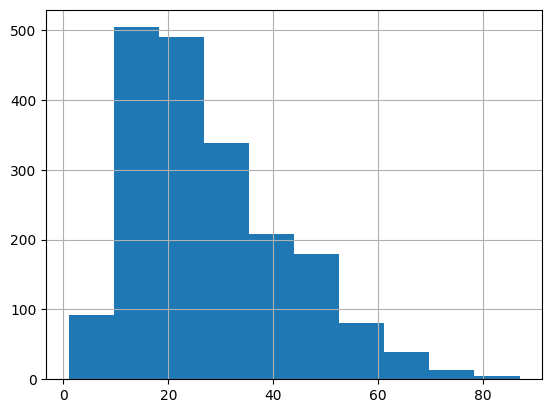

In [ ]:
# Question 2.4
saf['age_clean'] = saf['Age'].astype(str).str.strip()
saf['age_clean'] = saf['Age'].str.extract(r'(\d+)')
saf['age_clean'] = pd.to_numeric(saf['age_clean'], errors='coerce')
saf = saf[(saf['age_clean'] >= 1) & (saf['age_clean'] <= 100)]
saf['age_clean'].hist()

In [ ]:
# Question 2.5
saf['Sex'].unique()
saf['sex_clean'] = saf['Sex'].astype(str).str.strip().str.upper()
saf['sex_clean'] = saf['sex_clean'].replace({'M': 'MALE','MALE': 'MALE','F': 'FEMALE','FEMALE': 'FEMALE'})
prop_male = (saf['sex_clean'] == 'MALE').mean()
print(prop_male)

0.831368528959508


In [ ]:
# Question 2.6
saf['Type'].unique()
saf['type_clean'] = saf['Type'].astype(str).str.strip().str.lower()
saf['type_clean'] = saf['type_clean'].replace({'unprovoked': 'Unprovoked','provoked': 'Provoked'})
saf.loc[~saf['type_clean'].isin(['Unprovoked','Provoked']), 'type_clean'] = 'Unknown'
prop_unprovoked = (saf['type_clean'] == 'Unprovoked').mean()
print(prop_unprovoked)

0.796514607893388


In [ ]:
# Question 2.7
saf["Fatal Y/N"].unique()
saf["clean_fatal"] = saf["Fatal Y/N"].str.strip().str.upper()
def clean_fatal(val):
    if val == "Y":
        return "Y"
    elif val == "N":
        return "N"
    else:
        return "Unknown"

saf['Clean_Fatal'] = (saf['Fatal Y/N'].astype(str).str.strip().str.upper().apply(clean_fatal))
print(saf['Clean_Fatal'].unique())

['N' 'Y' 'Unknown']


In [ ]:
# Question 2.8
unprovoked_attacks = saf[saf["Type"] == "Unprovoked"]
sex_unprovoked_attacks = unprovoked_attacks['Sex'].value_counts()
print(sex_unprovoked_attacks)
print("\n")

type_fatality = saf.groupby('Type')['Clean_Fatal'].value_counts().unstack()
print(type_fatality)
print("\n")

fatality_sex = saf.groupby('Clean_Fatal')['Sex'].value_counts().unstack()
print(fatality_sex)

Sex
M     1274
F      261
F        2
M        1
Name: count, dtype: int64


Clean_Fatal     F       N  UNKNOWN      Y
Type                                     
Invalid       NaN     4.0      NaN    3.0
Provoked      NaN   156.0      NaN    5.0
Questionable  NaN     6.0      NaN    4.0
Sea Disaster  NaN    14.0      NaN   11.0
Unprovoked    2.0  1273.0      6.0  269.0
Watercraft    NaN    34.0      NaN    1.0
unprovoked    NaN     1.0      NaN    NaN


Sex              F   F        M   M 
Clean_Fatal                         
F              NaN  NaN     2.0  NaN
N            242.0  2.0  1228.0  1.0
UNKNOWN        NaN  NaN     5.0  NaN
Y             36.0  NaN   253.0  NaN


Sharks are more likely to launch unprovoked attacks men. Unprovoked attacks are more likely to be fatal than provoked attacks. Shark attacks are more likely to be fatal when the victim is male. Sharks are my favorite animal, especially great whites.

In [ ]:
# Question 2.9
saf['species_clean'] = saf['Species '].astype(str).str.lower()
saf['is_white'] = saf['species_clean'].str.contains("white", na=False)
prop_white = saf['is_white'].mean()
print(prop_white)

0.08918503331624808
